In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import csv
import pandas as pd
from datetime import datetime
import numpy as np
!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
!pip install xarray
!pip install rioxarray
import xarray as xr
import rioxarray


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 5.1 MB/s 
     |████████████████████████████████| 30.5 MB 1.7 MB/s 
     |████████████████████████████████| 6.3 MB 44.8 MB/s 
     |████████████████████████████████| 219 kB 50.9 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=1477b41354bd2e11d97ea6bf4a8dbae6b583af1beb6fa562b9b07abfbe6e958d
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=685eedf55a1fb315f884e5a03fe787bcf177cabc7dca176cbf074b4ba2d53e22
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


# Average Calculations

In [ ]:
from numpy import meshgrid

Enter file path & name. Choose which variable we want to investigate.

In [ ]:
from matplotlib.rcsetup import validate_bool_maybe_none
Thermocline=False
MXL=True
U=False
V=False
standard_cbar=False

open=('/content/drive/MyDrive/REU_2022_copy/ORA-1983-2018_mixedlayer.nc')



open dataset, rename variable somxl010 to mld_avg. Open dataset as xarray.

Then, take the mean mld_avg aross time. So average the 35 years (time) worth of mixed layer depths for each location. 



In [ ]:
stat='avg'
year='2022'

df2=xr.open_dataset(open)



# thermocline
if Thermocline:
  depth='Thermocline'
  plt_title='Thermocline Depth'
  therm=df2.so20chgt
  avg=therm.mean('time')
  experiment='ORA_' + depth + '_' + stat

# mixed layer
elif MXL:
  depth='MXL'
  plt_title='Mixed Layer Depth'
  mld=df2.somxl010
  avg=mld.mean('time') #compute the mean over time
  experiment='ORA_' + depth + '_' + stat

# U (zonal velocity)

elif U:
  #model='ORA'
  #vdepth = 47.21189 #1045.854 #508.6399 108.0303 1945.296 47.21189 1516.364
  model = 'GODAS'
  vdepth =  949  #459.0 105.0 949 2174 55 1479
  depth = str(int(vdepth))
  plt_title='U_zonal_Velocity'
  #df1=df2.vozocrte #added (for ORA)
  df1=df2.uogrddsl #added (for GODAS)
  u=df1.drop_vars('LEV') #added (for ORA)
  avg=u.mean('time')
  experiment=model + '-' + year + '_' + depth + '_' + 'U' + '_' + stat

# V (meridional velocity)
elif V:
  #model= 'ORA'
  #vdepth = 1516.364 #1045.854 #508.6399 108.0303 1945.296 47.21189 1516.364
  model = 'GODAS'
  vdepth =  55  #459.0 105.0 949 2174 55 1479
  depth = str(int(vdepth))
  plt_title='V_meridional_Velocity'
  #v=df2.vomecrtn #added (for ORA)
  v=df2.vogrddsl #added (for GODAS)
  avg=v.mean('time')
  experiment=model + '-' + year + '_' + depth +  '_' + 'V' + '_' + stat


print(df2)


<xarray.Dataset>
Dimensions:    (time: 432, latitude: 61, longitude: 161)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-15 1983-02-15 ... 2018-12-15
  * latitude   (latitude) float64 0.5 1.5 2.5 3.5 4.5 ... 57.5 58.5 59.5 60.5
  * longitude  (longitude) float64 120.0 121.0 122.0 123.0 ... 278.0 279.0 280.0
Data variables:
    somxl010   (time, latitude, longitude) float32 nan nan nan ... 27.51 12.33
Attributes: (12/28)
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_name:               APDRC
    creator_type:               institution
    creator_url:                http://apdrc.soest.hawaii.edu/thredds/dodsC/l...
    Easternmost_Easting:        280.0
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    Reanalysis Data ORAS5 1x1 grid somxl010 opa0
    time_coverage_end:          2018-12-15T00:00:00Z
    time_coverage_start:        1983-01-15T00

In [ ]:
print(avg)

<xarray.DataArray 'somxl010' (latitude: 61, longitude: 161)>
array([[      nan,       nan,       nan, ..., 19.04396 , 19.237135,
              nan],
       [18.851904, 16.106478, 15.862398, ..., 21.36301 , 20.47576 ,
        19.107141],
       [21.118212, 22.35952 , 21.36964 , ..., 20.693447, 20.948257,
        21.225206],
       ...,
       [      nan,       nan,       nan, ..., 19.796732, 16.979963,
        15.399329],
       [      nan,       nan,       nan, ..., 20.289516, 17.445751,
        15.022671],
       [      nan,       nan,       nan, ..., 20.100197, 18.655678,
        15.786355]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 0.5 1.5 2.5 3.5 4.5 ... 57.5 58.5 59.5 60.5
  * longitude  (longitude) float64 120.0 121.0 122.0 123.0 ... 278.0 279.0 280.0


In [ ]:
print(np.max(avg))
print(np.min(avg))

<xarray.DataArray 'somxl010' ()>
array(85.08614, dtype=float32)
<xarray.DataArray 'somxl010' ()>
array(5.7660885, dtype=float32)


Create a mesh grid with latitude and longitude (matrix indexing). Transpose the mld_avg matrix so that it is the same shape as the latitude and longitude matrices.

In [ ]:
lat,lon=meshgrid(avg['latitude'],avg['longitude'])
#grid=np.transpose(avg.values)
#grid1=np.transpose(avg.values) #added
#grid=np.delete(grid1,0,2) #added... the column is deleted, but the dimensions are not changing...
#grid1=np.transpose(avg.values)
#grid=np.delete(grid1,0,2)
# thermocline
if Thermocline:
  grid=np.transpose(avg.values)

# mixed layer
elif MXL:
  grid=np.transpose(avg.values)

# U (zonal velocity)
elif U:
  grid0=np.transpose(avg.values)
  grid=np.squeeze(grid0,axis=2)

# V (meridional velocity)
elif V:
  grid0=np.transpose(avg.values)
  grid=np.squeeze(grid0,axis=2)

lat.shape,lon.shape,grid.shape

((161, 61), (161, 61), (161, 61))

In [ ]:
print(lat[0],lon[0],lat[-1],lon[-1])

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5] [120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120.] [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5] [280. 280. 280. 280. 280. 280. 280. 280. 280. 280. 280. 280. 280. 2

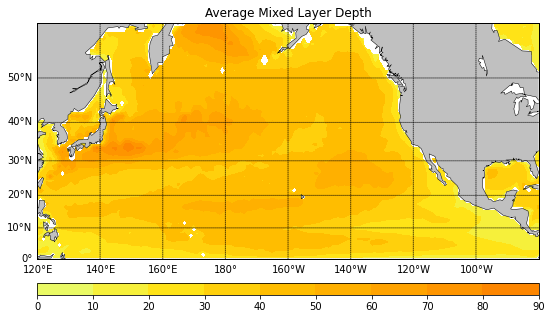

In [ ]:
from matplotlib.colors import BoundaryNorm
from matplotlib import pyplot as plt,patches
fig, ax = plt.subplots(figsize=(10,5))

m = Basemap(projection='merc',llcrnrlon=120.0,llcrnrlat=0.0,urcrnrlon=280.0,urcrnrlat=60.0,
                resolution='c',lat_1=0.0,lat_2=60.0,lat_0=30.0,lon_0=180.0)


m.drawcoastlines(color='black', linewidth=0.5)
m.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
m.drawmapboundary()

m.drawparallels(np.arange(0,60,10.0),labels=[1,0,0,0])
m.drawmeridians(np.arange(120,280,20.0),labels=[0,0,0,1])

x,y=m(lon,lat) #reprojects lon and lat using above basemap projection
if standard_cbar:
  con=plt.contourf(x,y,grid, vmin=-1.25, vmax=0.75) # remove vmin & vmax if not standard
else:
  con=plt.contourf(x,y,grid)


cbar=m.colorbar(con,'bottom',size='5%',pad='10%',cmap=plt.set_cmap('Wistia')) # Wistia for mixed layer ocean_r for thermocline
#cbar=m.colorbar(con,'bottom',size='5%',pad='2%')

#ax.add_patch(patches.Rectangle((0.25,0.25),0.50,0.50,edgecolor='black',facecolor='none',linewidth=2))

if standard_cbar:
  plt.title('Average ' + plt_title + ' at ' + depth + ' meters (Standard cbar)')
  plt.savefig('/content/drive/MyDrive/REU_2022_copy/plots_copy/Avg_and_STD_plots/' + experiment + '_standard_cbar' + '.png', format='png') # remove '_standard_cbar' if not standard

else:
  plt.title('Average ' + plt_title)
  #plt.title('Average ' + plt_title + ' at ' + depth + ' meters') # VELOCITY
  plt.savefig('/content/drive/MyDrive/REU_2022_copy/plots_copy/Avg_and_STD_plots/' + experiment + 'poster.png', format='png')
 
plt.show()



End Averages Calculations & Plots

# Standard Deviation Calcluations

In [ ]:
stat='std'
year='2022'

# thermocline
if Thermocline:  
  plt_title='Thermocline' 
  depth='Thermocline' 
  experiment1= 'ORA_'+ depth +'_' + stat
  therm=df2.so20chgt
  std=therm.std('time')

# mixed layer
elif MXL:
  plt_title='MXL' # mxl thermocline
  depth='MXL'
  experiment1= 'ORA_'+ depth +'_' + stat
  mld=df2.somxl010
  std=mld.std('time') # compute mean over time

# U (zonal velocity)
elif U:
  plt_title='U_zonal_Velocity'
  #model='ORA'
  #vdepth = 47.21189  #1045.854 #508.6399 108.0303 1945.296 47.21189 1516.364
  model = 'GODAS'
  vdepth =  949  #459.0 105.0 949 2174 55 1479
  depth = str(int(vdepth))
  experiment1=model + '-' + year + '_' + depth + '_' + 'U' + '_'  + stat
  #u=df2.vozocrte #added for (ORA)
  u=df2.uogrddsl #added (for GODAS)
  std=u.std('time')


# V (meridional velocity)
elif V:
  plt_title='V_meridional_Velocity'
  #model='ORA'
  #vdepth = 1516.364 #1045.854 #508.6399 108.0303 1945.296 47.21189 1516.364
  model = 'GODAS'
  vdepth =  55  #459.0 105.0 949 2174 55 1479
  depth = str(int(vdepth))
  plt_title='V_meridional_'
  #v=df2.vomecrtn #added (for ORA)
  v=df2.vogrddsl #added (for GODAS)
  std=v.std('time')
  experiment1=model + '-' + year + '_' + depth + '_' + 'V' + '_' + stat


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [ ]:
print(std)

<xarray.DataArray 'somxl010' (latitude: 61, longitude: 161)>
array([[      nan,       nan,       nan, ..., 5.763731 , 5.5886283,
              nan],
       [4.871517 , 4.927441 , 4.4295034, ..., 7.775425 , 7.612421 ,
        6.671871 ],
       [6.48569  , 6.9740577, 6.245818 , ..., 8.257203 , 8.496143 ,
        8.777061 ],
       ...,
       [      nan,       nan,       nan, ..., 7.846962 , 5.8915644,
        5.044096 ],
       [      nan,       nan,       nan, ..., 7.532911 , 5.723454 ,
        3.525115 ],
       [      nan,       nan,       nan, ..., 7.0370607, 6.4319205,
        4.586317 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 0.5 1.5 2.5 3.5 4.5 ... 57.5 58.5 59.5 60.5
  * longitude  (longitude) float64 120.0 121.0 122.0 123.0 ... 278.0 279.0 280.0


In [ ]:
print(np.max(std))
print(np.min(std))

<xarray.DataArray 'somxl010' ()>
array(86.70214, dtype=float32)
<xarray.DataArray 'somxl010' ()>
array(5.271633e-07, dtype=float32)


In [ ]:
'''
lat,lon=meshgrid(std['latitude'],std['longitude'])
grid_std=np.transpose(std.values)

lat.shape,lon.shape,grid_std.shape

lat,lon=meshgrid(std['latitude'],std['longitude'])
#grid=np.transpose(avg.values)
#grid1=np.transpose(avg.values) #added
#grid=np.delete(grid1,0,2) #added... the column is deleted, but the dimensions are not changing...
#grid1=np.transpose(avg.values)
#grid=np.delete(grid1,0,2)
'''
# thermocline
if Thermocline:
  grid_std=np.transpose(std.values)

# mixed layer
elif MXL:
  grid_std=np.transpose(std.values)

# U (zonal velocity)
elif U:
  grid0=np.transpose(std.values)
  grid_std=np.squeeze(grid0,axis=2)

# V (meridional velocity)
elif V:
  grid0=np.transpose(std.values)
  grid_std=np.squeeze(grid0,axis=2)

lat.shape,lon.shape,grid_std.shape

((161, 61), (161, 61), (161, 61))

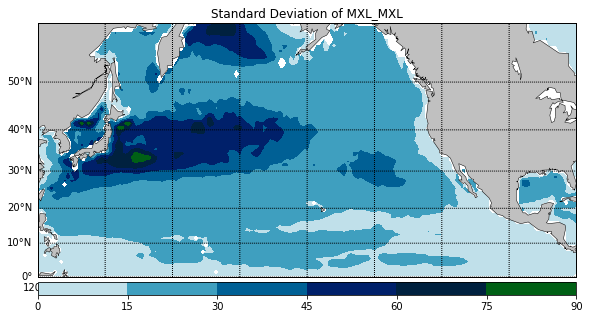

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

m2 = Basemap(projection='merc',llcrnrlon=120.0,llcrnrlat=0.0,urcrnrlon=280.0,urcrnrlat=60.0,
                resolution='c',lat_1=0.0,lat_2=60.0,lat_0=30.0,lon_0=180.0)



m2.drawcoastlines(color='black', linewidth=0.5)
m2.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
m2.drawmapboundary()

m2.drawparallels(np.arange(0,60,10.0),labels=[1,0,0,0])
m2.drawmeridians(np.arange(120,280,20.0),labels=[0,0,0,1])

x,y=m2(lon,lat) #reprojects lon and lat using above basemap projection
if standard_cbar: 
  con=plt.contourf(x,y,grid_std, vmin=0, vmax=0.40) # remove vmin & vmax if not looking for standard
else:
  con=plt.contourf(x,y,grid_std)

cbar=m2.colorbar(con,'bottom',size='5%',pad='2%')

if standard_cbar:
  plt.title('Standard Deviation of ' + plt_title + '_' + depth + 'Standard Cbar')
  plt.savefig('/content/drive/MyDrive/REU_2022_copy/plots_copy/Avg_and_STD_plots/' + experiment1 + '_standard_cbar' + '.png', format='png') # remove '_standard_cbar' if not standard
else:
  plt.title('Standard Deviation of ' + plt_title + '_' + depth)
  plt.savefig('/content/drive/MyDrive/REU_2022_copy/plots_copy/Avg_and_STD_plots/' + experiment1 + '.png', format='png')

plt.show()
